# Análise e Visualização de Dados de Vendas em Shoppings de Istambul



In [9]:
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats


In [2]:
FILE_ZIP = '/content/shopping istambul.zip'
FILE_DATASET = 'customer_shopping_data.csv'

with zipfile.ZipFile(FILE_ZIP, 'r') as zf:
  with zf.open(FILE_DATASET) as f:
    df = pd.read_csv(f)


### Estrutura do dataset ###

In [ ]:
display(df.head(10))
display(df.tail())
display(df.columns)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

- Renomeando as colunas

In [3]:
columns = [
   'numero_fatura',
    'id_cliente',
     'genero',
   'idade',
    'categoria',
     'quantidade',
    'preco',
     'metodo_pagamento',
    'data_fatura',
    'shopping'
]

df.columns = columns

- Tipo dos dados

In [ ]:
display(df.shape)
display(df.dtypes)
display(df.isnull().sum())

(99457, 10)

,0
numero_fatura,object
id_cliente,object
genero,object
idade,int64
categoria,object
quantidade,int64
preco,float64
metodo_pagamento,object
data_fatura,object
shopping,object


,0
numero_fatura,0
id_cliente,0
genero,0
idade,0
categoria,0
quantidade,0
preco,0
metodo_pagamento,0
data_fatura,0
shopping,0


### visualização de dados ###

- Matriz de dispersão

<Figure size 2200x2200 with 0 Axes>

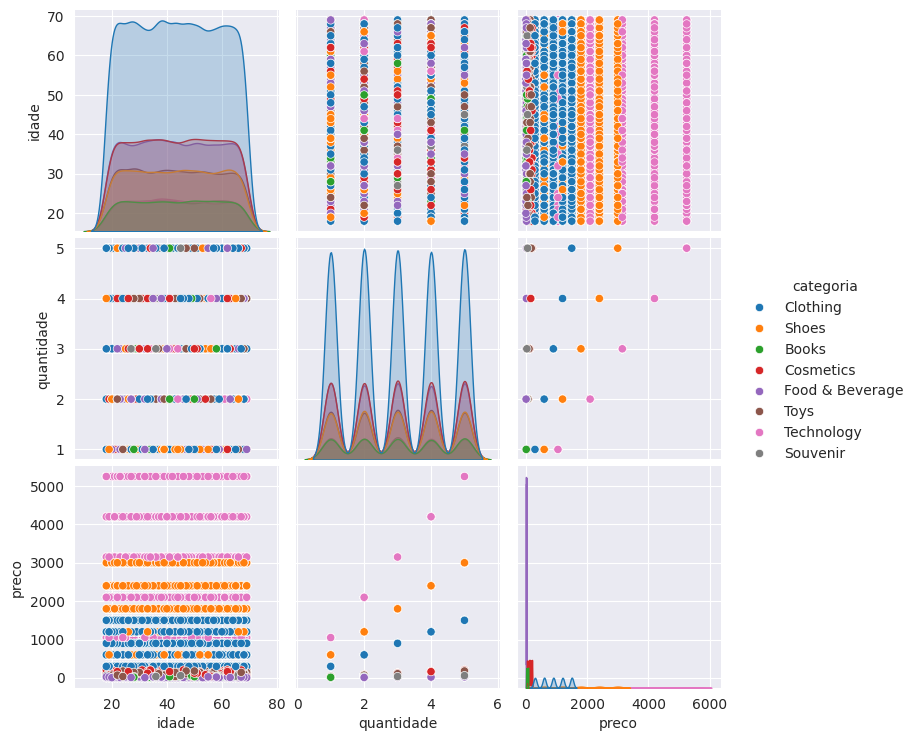

In [ ]:
plt.figure(figsize=(22,22))
with sns.axes_style('darkgrid'):
  fig = sns.pairplot(data = df, hue = 'categoria');



### 👉 Conclusão resumida  ###
> As categorias com maior volume de compras são roupas e acessórios e, dentro do conjunto de consumidores, o grupo feminino é o que mais realiza compras.

### Cupons fiscais ###

- Emissão por gênero

In [ ]:
gender = df.groupby('genero')['numero_fatura'].count()
gender_pct = df.groupby('genero')['numero_fatura'].count() / df['numero_fatura'].count()
display(gender, gender_pct)


,numero_fatura
genero,
Female,59482
Male,39975


,numero_fatura
genero,
Female,0.598068
Male,0.401932


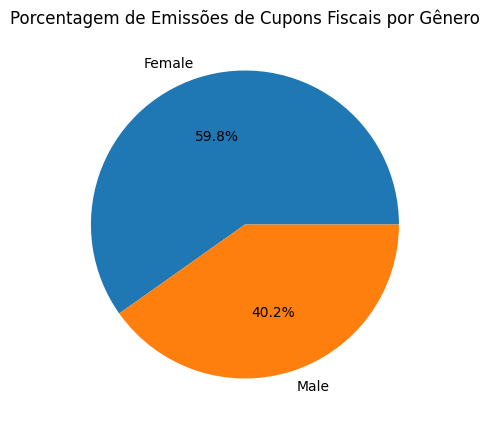

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(gender_pct, labels=gender_pct.index, autopct='%1.1f%%')
plt.title('Porcentagem de Emissões de Cupons Fiscais por Gênero')
plt.show()

### Valor gasto por gênero ###

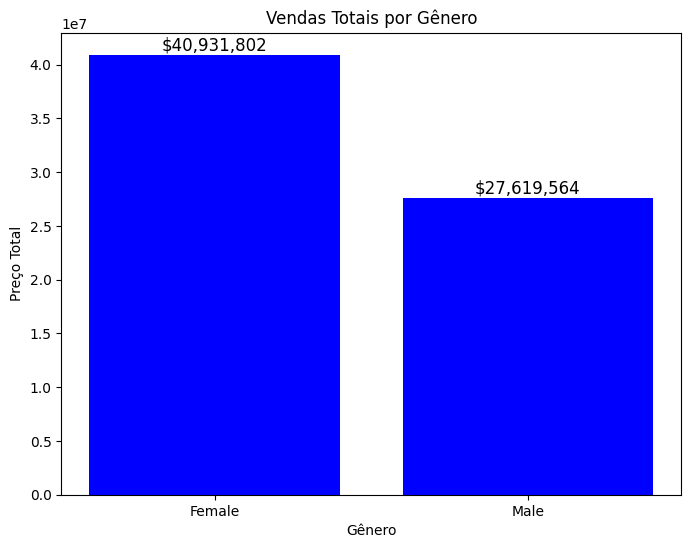

In [ ]:

price_gender = df.groupby('genero')['preco'].sum()

plt.figure(figsize=(8,6))
plt.bar(price_gender.index, price_gender.values, color='blue')

for index, value in enumerate(price_gender):
    plt.text(index, value + 20000, f'${value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Gênero')
plt.ylabel('Preço Total')
plt.title('Vendas Totais por Gênero')
plt.show()

### Total de items por genero ###

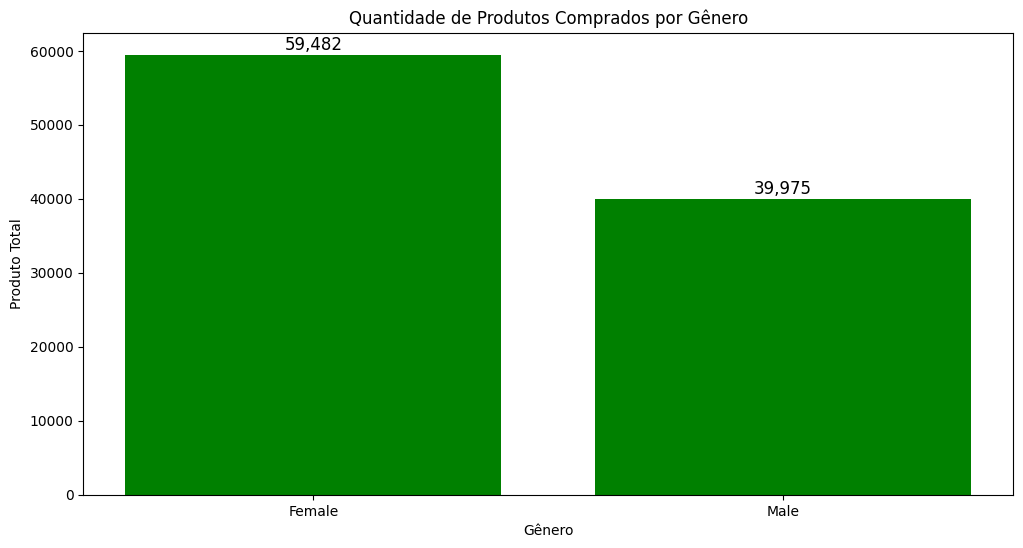

In [ ]:


product_gender = df.groupby('genero')['quantidade'].count()

plt.figure(figsize=(12,6))
plt.bar(product_gender.index, product_gender.values, color='green')

for index, value in enumerate(product_gender):
    plt.text(index, value + 100, f'{value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Gênero')
plt.ylabel('Produto Total')
plt.title('Quantidade de Produtos Comprados por Gênero')
plt.show()

### 👉 Conclusão resumida ###
> As mulheres são responsáveis por 60% (ou 59.8%) das emissões de cupons fiscais, enquanto os homens representam 40% (ou 40.2%) nos shoppings de Istambul.



### Aplicando o teste T ###

- Valor gasto

In [ ]:
m = df[df['genero'] == 'Male']['preco']
f = df[df['genero'] == 'Female']['preco']
estatic_t,p_valor = stats.ttest_ind(f,m)
display(estatic_t, p_valor)

np.float64(-0.45725199179880294)

np.float64(0.6474909309116355)

- Quantidade de produtos

In [ ]:
m = df[df['genero'] == 'Male']['quantidade']
f = df[df['genero'] == 'Female']['quantidade']
estatic_t,p_valor = stats.ttest_ind(f,m)
display(estatic_t, p_valor)

np.float64(0.041462731266803256)

np.float64(0.9669270866604878)

> Apesar de os gráficos apontarem para uma diferença visualmente significativa nos gastos e na quantidade de itens comprados por gênero, a análise estatística do teste T não encontrou evidências suficientes para comprovar essa diferença. O resultado sugere que as variações observadas podem ser aleatórias, e não um padrão real de comportamento.



- Compras por shopping

In [ ]:
shopping_invoice = df.groupby('shopping')['numero_fatura'].count().sort_values(ascending=False)


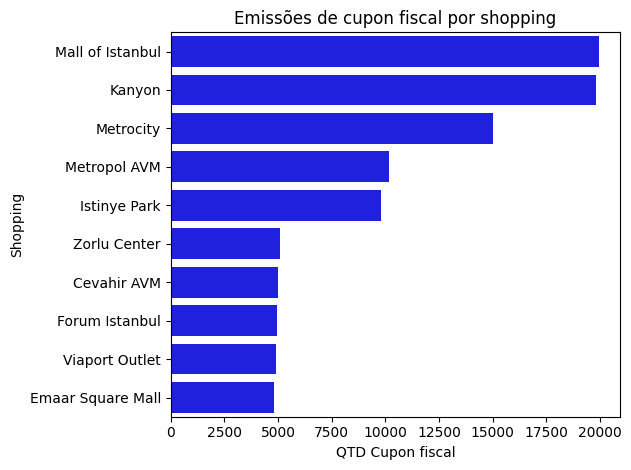

In [ ]:
sns.barplot(x=shopping_invoice.values, y=shopping_invoice.index, orient='h', color='blue')
plt.title('Emissões de cupon fiscal por shopping')
plt.xlabel('QTD Cupon fiscal')
plt.ylabel('Shopping')
plt.tight_layout()
plt.show();

- Gênero por shopping

In [ ]:
gender_invoice_shopping = df.groupby(['shopping', 'genero'])['numero_fatura'].count()

In [ ]:
display(gender_invoice_shopping)

shopping           genero
Cevahir AVM        Female     2940
                   Male       2051
Emaar Square Mall  Female     2842
                   Male       1969
Forum Istanbul     Female     3016
                   Male       1931
Istinye Park       Female     5874
                   Male       3907
Kanyon             Female    11906
                   Male       7917
Mall of Istanbul   Female    11902
                   Male       8041
Metrocity          Female     8941
                   Male       6070
Metropol AVM       Female     6144
                   Male       4017
Viaport Outlet     Female     2949
                   Male       1965
Zorlu Center       Female     2968
                   Male       2107
Name: numero_fatura, dtype: int64

### Adicionando cordenadas geograficas ###

In [4]:

geo_shopping = {
    'shopping': [
        'Mall of Istanbul', 'Metropol AVM', 'Istinye Park',
        'Emaar Square Mall', 'Kanyon', 'Cevahir AVM',
        'Viaport Outlet', 'Forum Istanbul', 'Metrocity', 'Zorlu Center'
    ],
    'lat': [
        41.062527, 40.9945, 41.110438, 41.00432, 41.0583,
        41.0531, 40.9238, 41.0450, 41.0772, 41.0678
    ],
    'lng': [
        28.804951, 29.1219, 29.032919, 29.07118, 29.0141,
        28.9859, 29.3093, 28.9038, 29.0062, 29.0163
    ]
}

geo = pd.DataFrame(geo_shopping)
df = pd.merge(df, geo, on='shopping', how='inner')
df.head()

,numero_fatura,id_cliente,genero,idade,categoria,quantidade,preco,metodo_pagamento,data_fatura,shopping,lat,lng
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,41.0583,29.0141
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,41.0450,28.9038
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,41.0772,29.0062
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,40.9945,29.1219
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,41.0583,29.0141


- Exportando os dados

In [5]:
df.to_csv('shopping.csv', index=False)

### Mapa dos shoppings ###

- Criando uma tabela de compras por genero

In [7]:
shopping_pivot = (
    df.groupby(['shopping', 'lat', 'lng', 'genero'])['numero_fatura']
    .count()
    .reset_index()
    .pivot(
        index=['shopping', 'lat', 'lng'],
        columns='genero',
        values='numero_fatura'
    ).reset_index()
)
shopping_pivot = shopping_pivot.rename(columns={'Female': 'Feminino', 'Male': 'Masculino'})


In [10]:

istambul_coords = [41.0082, 28.9784]
m = folium.Map(location=istambul_coords, zoom_start=11, tiles='CartoDB dark_matter')

for index, row in shopping_pivot.iterrows():
    total_faturas = row['Feminino'] + row['Masculino']
    popup_text = (
        f"<b>{row['shopping']}</b><br>"
        f"Total de Faturas: {int(total_faturas)}<br>"
        f"Feminino: {int(row['Feminino'])}<br>"
        f"Masculino: {int(row['Masculino'])}"
    )

    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=popup_text,
        tooltip=row['shopping'],
        icon=folium.Icon(color='red')
    ).add_to(m)

    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=total_faturas / 2000,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        tooltip=row['shopping']
    ).add_to(m)

m.save("mapa_dark.html")
m

# Resumo
> "Em conclusão, a análise aprofundada nos dados de compras de Istambul revela um ponto crucial sobre a ciência de dados: a visualização pode ser enganosa. Embora os gráficos iniciais tenham sugerido que as mulheres gastam mais e compram mais itens que os homens, o teste T revelou que a diferença entre as médias de gastos e de quantidade não é estatisticamente significativa. Essa descoberta sublinha a importância de validar visualizações com testes estatísticos rigorosos para chegar a conclusões confiáveis."